# Funções de Ativação em Redes Neurais - Parte 2

## Introdução

Neste notebook, continuaremos nossa exploração das funções de ativação em redes neurais, focando nas funções mais modernas como ReLU, Leaky ReLU e Softmax, que ajudaram a impulsionar o campo do Deep Learning.

In [1]:
# Importação das bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.colors as mcolors
from matplotlib import cm

## Função ReLU (Rectified Linear Unit)

A função ReLU (Unidade Linear Retificada) se tornou a função de ativação padrão para muitas redes neurais modernas, especialmente em redes convolucionais. Sua simplicidade e eficácia a tornaram extremamente popular.

### Definição Matemática

$f(x) = \max(0, x)$

### Derivada

$f'(x) = \begin{cases} 1 & \text{se } x > 0 \\ 0 & \text{se } x \leq 0 \end{cases}$

### Características

- **Intervalo de saída**: [0, ∞)
- **Não-saturação**: Não satura para valores positivos, evitando o problema do gradiente desaparecendo
- **Esparsidade**: Produz ativações esparsas (muitos neurônios com saída zero)
- **Computacionalmente eficiente**: Operação simples de máximo

<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_108788/1825345852.py:21: SyntaxWarning: invalid escape sequence '\m'
  ax.plot(x, y_relu, 'r-', linewidth=2, label='ReLU: $f(x) = \max(0, x)$')


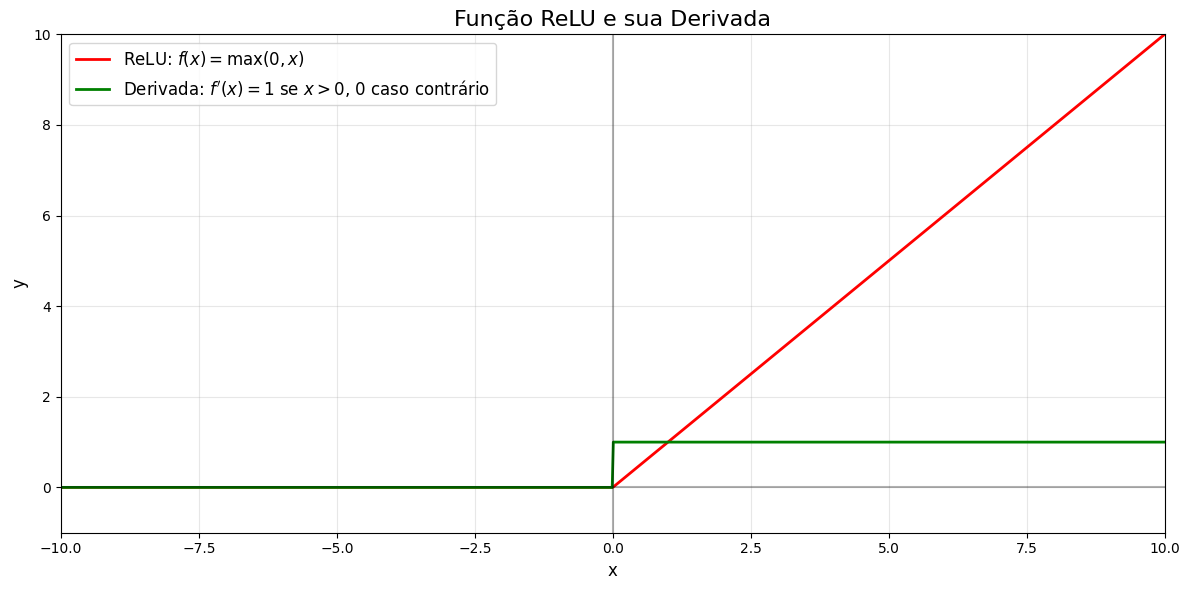

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Implementação da função ReLU e sua derivada
def relu(x):
    """Função ReLU"""
    return np.maximum(0, x)

def relu_derivative(x):
    """Derivada da função ReLU"""
    return np.where(x > 0, 1, 0)

# Visualização da função ReLU e sua derivada
def plot_relu():
    x = np.linspace(-10, 10, 1000)
    y_relu = relu(x)
    y_derivative = relu_derivative(x)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    ax.plot(x, y_relu, 'r-', linewidth=2, label='ReLU: $f(x) = \max(0, x)$')
    ax.plot(x, y_derivative, 'g-', linewidth=2, 
            label='Derivada: $f\'(x) = 1$ se $x > 0$, $0$ caso contrário')
    
    # Adicionar linhas de referência
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    # Configurar o gráfico
    ax.set_xlim(-10, 10)
    ax.set_ylim(-1, 10)
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.set_title('Função ReLU e sua Derivada', fontsize=16)
    ax.legend(fontsize=12)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_relu()

### Vantagens e Desvantagens da ReLU

#### Vantagens
- **Computacionalmente eficiente**: Operação simples de máximo
- **Evita o problema do gradiente desaparecendo** para entradas positivas
- **Induz esparsidade** na rede, o que pode ser benéfico para a representação de dados
- **Convergência mais rápida** durante o treinamento em comparação com sigmoid e tanh

#### Desvantagens
- **Problema do "neurônio morto"**: Neurônios podem "morrer" durante o treinamento se sempre receberem entradas negativas, pois o gradiente será zero e os pesos não serão atualizados
- **Não é diferenciável em x = 0**: Embora na prática isso raramente cause problemas
- **Saídas não limitadas**: Pode levar a problemas de estabilidade numérica

## Função Leaky ReLU

A função Leaky ReLU foi proposta para resolver o problema do "neurônio morto" da ReLU, permitindo um pequeno gradiente para entradas negativas.

### Definição Matemática

$f(x) = \begin{cases} x & \text{se } x > 0 \\ \alpha x & \text{se } x \leq 0 \end{cases}$

Onde $\alpha$ é um pequeno valor positivo (geralmente 0.01).

### Derivada

$f'(x) = \begin{cases} 1 & \text{se } x > 0 \\ \alpha & \text{se } x \leq 0 \end{cases}$

### Características

- **Intervalo de saída**: (-∞, ∞)
- **Não-saturação**: Não satura em nenhuma direção
- **Gradiente não-zero**: Sempre tem um gradiente não-zero, evitando o problema do "neurônio morto"

<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\l'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_23482/3354862173.py:21: SyntaxWarning: invalid escape sequence '\m'
  ax.plot(x, y_leaky_relu, 'r-', linewidth=2, label='Leaky ReLU: $f(x) = \max(\\alpha x, x)$ com $\\alpha=0.01$')
/tmp/ipykernel_23482/3354862173.py:23: SyntaxWarning: invalid escape sequence '\l'
  label='Derivada: $f\'(x) = 1$ se $x > 0$, $\\alpha$ se $x \leq 0$')


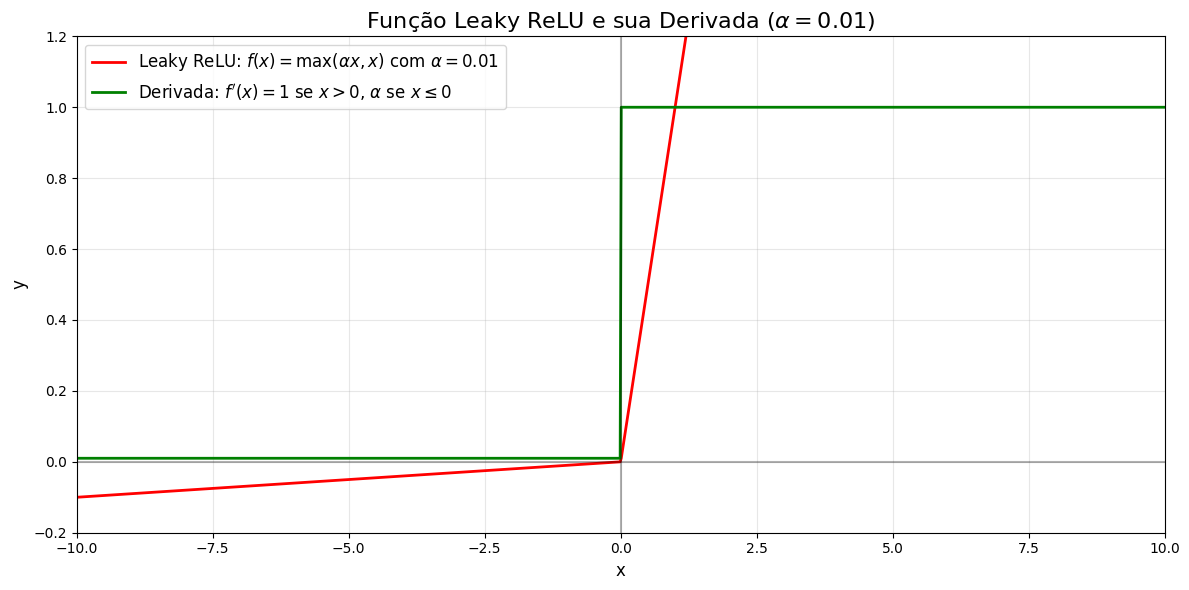

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Implementação da função Leaky ReLU e sua derivada
def leaky_relu(x, alpha=0.01):
    """Função Leaky ReLU"""
    return np.maximum(alpha * x, x)

def leaky_relu_derivative(x, alpha=0.01):
    """Derivada da função Leaky ReLU"""
    return np.where(x > 0, 1, alpha)

# Visualização da função Leaky ReLU e sua derivada
def plot_leaky_relu():
    x = np.linspace(-10, 10, 1000)
    y_leaky_relu = leaky_relu(x)
    y_derivative = leaky_relu_derivative(x)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    ax.plot(x, y_leaky_relu, 'r-', linewidth=2, label='Leaky ReLU: $f(x) = \max(\\alpha x, x)$ com $\\alpha=0.01$')
    ax.plot(x, y_derivative, 'g-', linewidth=2, 
            label='Derivada: $f\'(x) = 1$ se $x > 0$, $\\alpha$ se $x \leq 0$')
    
    # Adicionar linhas de referência
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    # Configurar o gráfico
    ax.set_xlim(-10, 10)
    ax.set_ylim(-0.2, 1.2)  # Ajustado para melhor visualização da derivada
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.set_title('Função Leaky ReLU e sua Derivada ($\\alpha=0.01$)', fontsize=16)
    ax.legend(fontsize=12)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_leaky_relu()

### Comparação entre ReLU e Leaky ReLU

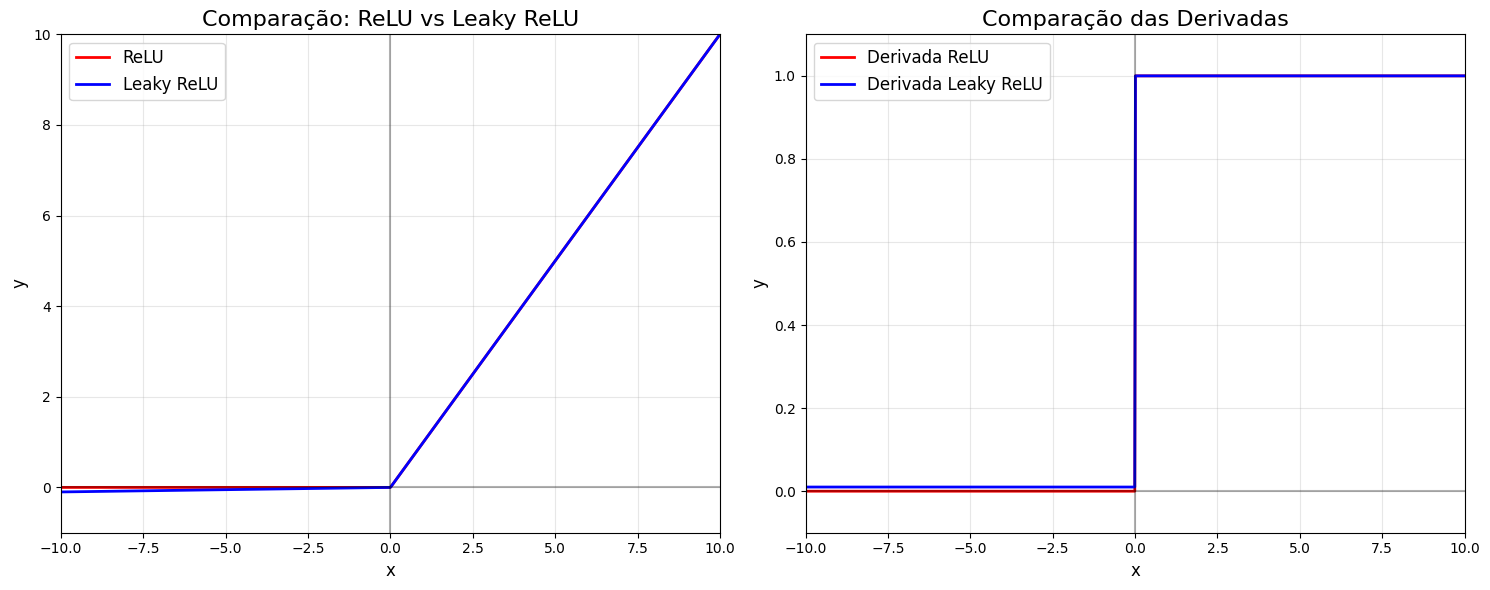

In [10]:
# Comparação entre ReLU e Leaky ReLU
def compare_relu_leaky_relu():
    x = np.linspace(-10, 10, 1000)
    y_relu = relu(x)
    y_leaky_relu = leaky_relu(x)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plotar as funções
    ax1.plot(x, y_relu, 'r-', linewidth=2, label='ReLU')
    ax1.plot(x, y_leaky_relu, 'b-', linewidth=2, label='Leaky ReLU')
    
    # Adicionar linhas de referência
    ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    # Configurar o primeiro gráfico
    ax1.set_xlim(-10, 10)
    ax1.set_ylim(-1, 10)
    ax1.set_xlabel('x', fontsize=12)
    ax1.set_ylabel('y', fontsize=12)
    ax1.set_title('Comparação: ReLU vs Leaky ReLU', fontsize=16)
    ax1.legend(fontsize=12)
    ax1.grid(True, alpha=0.3)
    
    # Plotar as derivadas
    ax2.plot(x, relu_derivative(x), 'r-', linewidth=2, label='Derivada ReLU')
    ax2.plot(x, leaky_relu_derivative(x), 'b-', linewidth=2, label='Derivada Leaky ReLU')
    
    # Adicionar linhas de referência
    ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    # Configurar o segundo gráfico
    ax2.set_xlim(-10, 10)
    ax2.set_ylim(-0.1, 1.1)
    ax2.set_xlabel('x', fontsize=12)
    ax2.set_ylabel('y', fontsize=12)
    ax2.set_title('Comparação das Derivadas', fontsize=16)
    ax2.legend(fontsize=12)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

compare_relu_leaky_relu()

## Função Softmax

A função Softmax é comumente usada na camada de saída de redes neurais para problemas de classificação multiclasse. Ela converte um vetor de valores reais em uma distribuição de probabilidade.

### Definição Matemática

$\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}}$

Onde $x_i$ é o i-ésimo elemento do vetor de entrada $x$ e $n$ é o número de classes.

### Características

- **Intervalo de saída**: (0, 1) para cada elemento, com soma total igual a 1
- **Interpretação probabilística**: As saídas podem ser interpretadas como probabilidades
- **Sensibilidade a diferenças relativas**: Amplifica pequenas diferenças entre os maiores valores de entrada

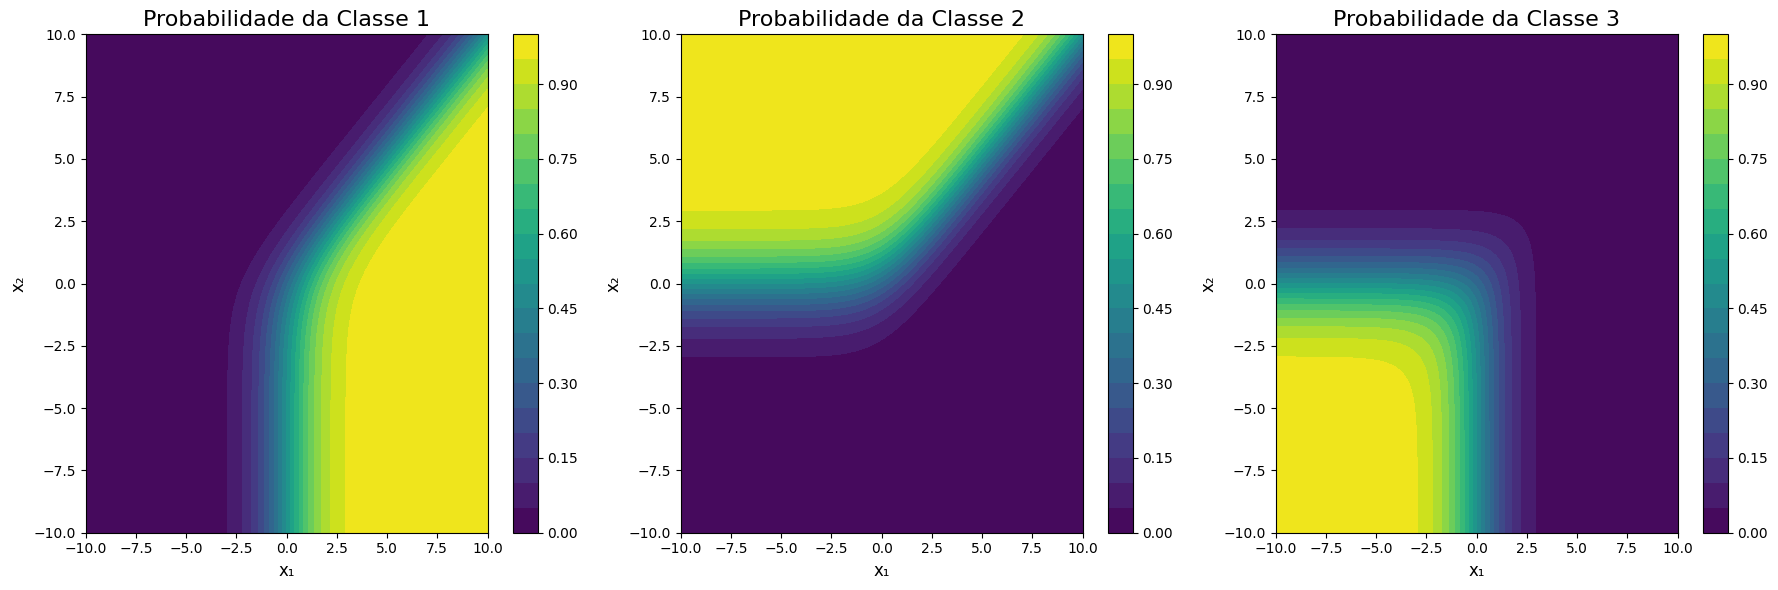

Exemplos de Softmax:
Entrada: [1, 2, 3]
Saída (probabilidades): [0.09003057 0.24472847 0.66524096]
Soma das probabilidades: 0.9999999999999999

Entrada: [1, 1, 1]
Saída (probabilidades): [0.33333333 0.33333333 0.33333333]
Soma das probabilidades: 1.0

Entrada: [10, 1, 0.1]
Saída (probabilidades): [9.99826446e-01 1.23388386e-04 5.01659740e-05]
Soma das probabilidades: 0.9999999999999998

Entrada: [-10, -10, -10]
Saída (probabilidades): [0.33333333 0.33333333 0.33333333]
Soma das probabilidades: 1.0



In [11]:
# Implementação da função Softmax
def softmax(x):
    """Função Softmax"""
    # Subtrair o máximo para estabilidade numérica
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

# Visualização da função Softmax
def plot_softmax():
    # Criar dados para o gráfico
    x = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(x, x)
    Z = np.zeros((100, 100, 3))
    
    # Calcular Softmax para cada ponto
    for i in range(100):
        for j in range(100):
            Z[i, j] = softmax(np.array([X[i, j], Y[i, j], 0]))
    
    # Criar figura
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    
    # Plotar a probabilidade da classe 1
    c1 = ax1.contourf(X, Y, Z[:, :, 0], 20, cmap='viridis')
    ax1.set_title('Probabilidade da Classe 1', fontsize=16)
    ax1.set_xlabel('x₁', fontsize=12)
    ax1.set_ylabel('x₂', fontsize=12)
    fig.colorbar(c1, ax=ax1)
    
    # Plotar a probabilidade da classe 2
    c2 = ax2.contourf(X, Y, Z[:, :, 1], 20, cmap='viridis')
    ax2.set_title('Probabilidade da Classe 2', fontsize=16)
    ax2.set_xlabel('x₁', fontsize=12)
    ax2.set_ylabel('x₂', fontsize=12)
    fig.colorbar(c2, ax=ax2)
    
    # Plotar a probabilidade da classe 3
    c3 = ax3.contourf(X, Y, Z[:, :, 2], 20, cmap='viridis')
    ax3.set_title('Probabilidade da Classe 3', fontsize=16)
    ax3.set_xlabel('x₁', fontsize=12)
    ax3.set_ylabel('x₂', fontsize=12)
    fig.colorbar(c3, ax=ax3)
    
    plt.tight_layout()
    plt.show()
    
    # Exemplo com valores específicos
    print("Exemplos de Softmax:")
    examples = [
        [1, 2, 3],
        [1, 1, 1],
        [10, 1, 0.1],
        [-10, -10, -10]
    ]
    
    for ex in examples:
        probs = softmax(np.array(ex))
        print(f"Entrada: {ex}")
        print(f"Saída (probabilidades): {probs}")
        print(f"Soma das probabilidades: {np.sum(probs)}\n")

plot_softmax()

### Relação entre Softmax e Entropia Cruzada

A função Softmax é frequentemente usada em conjunto com a função de perda de entropia cruzada para problemas de classificação multiclasse. A combinação dessas duas funções resulta em uma expressão simples para o gradiente, o que facilita o processo de backpropagation.

Para um problema de classificação com $n$ classes, a perda de entropia cruzada é definida como:

$E = -\sum_{i=1}^{n} y_i \log(\hat{y}_i)$

Onde $y_i$ é o valor desejado (0 ou 1) para a classe $i$ e $\hat{y}_i$ é a probabilidade prevista pela rede para a classe $i$ (saída da função Softmax).

Quando combinada com a função Softmax, o gradiente da perda em relação às entradas da Softmax (antes da aplicação da função) tem uma forma simples:

$\frac{\partial E}{\partial x_i} = \hat{y}_i - y_i$

Esta simplicidade é uma das razões pelas quais a combinação Softmax + Entropia Cruzada é tão popular em problemas de classificação.

## Comparação entre Todas as Funções de Ativação

Vamos comparar todas as funções de ativação que discutimos nestes notebooks:

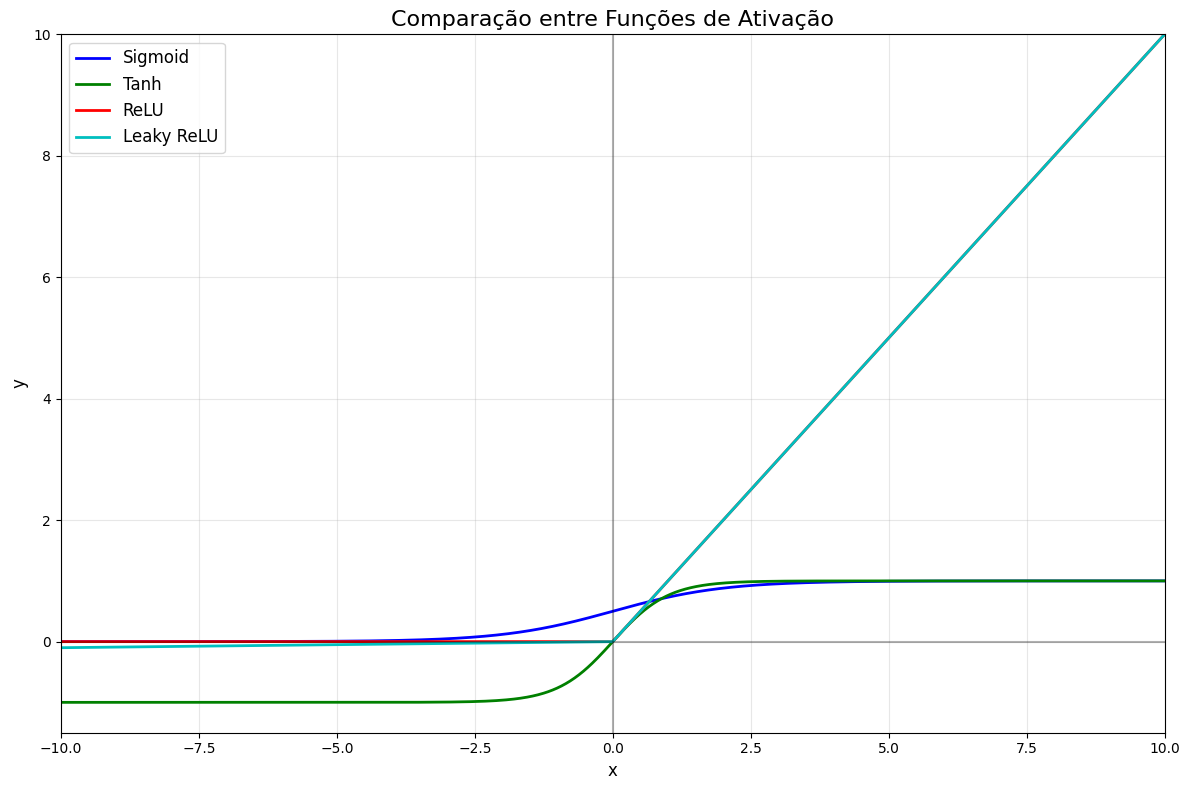

In [12]:
# Comparação entre todas as funções de ativação
def compare_all_activations():
    # Definir as funções de ativação
    def sigmoid(x):
        return 1.0 / (1.0 + np.exp(-x))
    
    def tanh(x):
        return np.tanh(x)
    
    def relu(x):
        return np.maximum(0, x)
    
    def leaky_relu(x, alpha=0.01):
        return np.maximum(alpha * x, x)
    
    # Criar dados para o gráfico
    x = np.linspace(-10, 10, 1000)
    y_sigmoid = sigmoid(x)
    y_tanh = tanh(x)
    y_relu = relu(x)
    y_leaky_relu = leaky_relu(x)
    
    # Criar figura
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plotar as funções
    ax.plot(x, y_sigmoid, 'b-', linewidth=2, label='Sigmoid')
    ax.plot(x, y_tanh, 'g-', linewidth=2, label='Tanh')
    ax.plot(x, y_relu, 'r-', linewidth=2, label='ReLU')
    ax.plot(x, y_leaky_relu, 'c-', linewidth=2, label='Leaky ReLU')
    
    # Adicionar linhas de referência
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    # Configurar o gráfico
    ax.set_xlim(-10, 10)
    ax.set_ylim(-1.5, 10)
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.set_title('Comparação entre Funções de Ativação', fontsize=16)
    ax.legend(fontsize=12)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

compare_all_activations()

## Resumo das Funções de Ativação

| Função | Fórmula | Intervalo | Vantagens | Desvantagens | Uso Comum |
|--------|---------|-----------|-----------|--------------|------------|
| Sigmoid | $\frac{1}{1 + e^{-x}}$ | (0, 1) | Suave, limitada, interpretável como probabilidade | Gradiente desaparecendo, saídas não centradas em zero | Camadas de saída para classificação binária |
| Tanh | $\frac{e^x - e^{-x}}{e^x + e^{-x}}$ | (-1, 1) | Suave, limitada, centrada em zero | Gradiente desaparecendo | RNNs, camadas ocultas |
| ReLU | $\max(0, x)$ | [0, ∞) | Computacionalmente eficiente, não satura para valores positivos | Problema do "neurônio morto" | CNNs, camadas ocultas em redes profundas |
| Leaky ReLU | $\max(\alpha x, x)$ | (-∞, ∞) | Evita o problema do "neurônio morto", não satura | Hiperparâmetro adicional ($\alpha$) | Alternativa ao ReLU em redes profundas |
| Softmax | $\frac{e^{x_i}}{\sum_{j} e^{x_j}}$ | (0, 1) com soma 1 | Interpretável como probabilidades, útil para multiclasse | Computacionalmente cara | Camada de saída para classificação multiclasse |

## Resumo

1. As funções de ativação introduzem não-linearidades que são essenciais para o poder de representação das redes neurais.

2. Funções como Sigmoid e Tanh sofrem do problema do gradiente desaparecendo, o que pode dificultar o treinamento de redes profundas.

3. ReLU e suas variantes (como Leaky ReLU) ajudaram a impulsionar o campo do Deep Learning por não saturarem para valores positivos, permitindo um treinamento mais eficiente de redes profundas.

4. A escolha da função de ativação depende do problema específico, da arquitetura da rede e da camada em questão.

5. A função Softmax é especialmente útil na camada de saída para problemas de classificação multiclasse, pois produz uma distribuição de probabilidade sobre as classes.

A compreensão das funções de ativação e de suas propriedades é fundamental para o design e treinamento eficiente de redes neurais artificiais.